In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import mitsuba as mi
sys.path.append('..')
from util import imshow_compare
mi.set_variant('scalar_rgb')

## Compare with a single seed

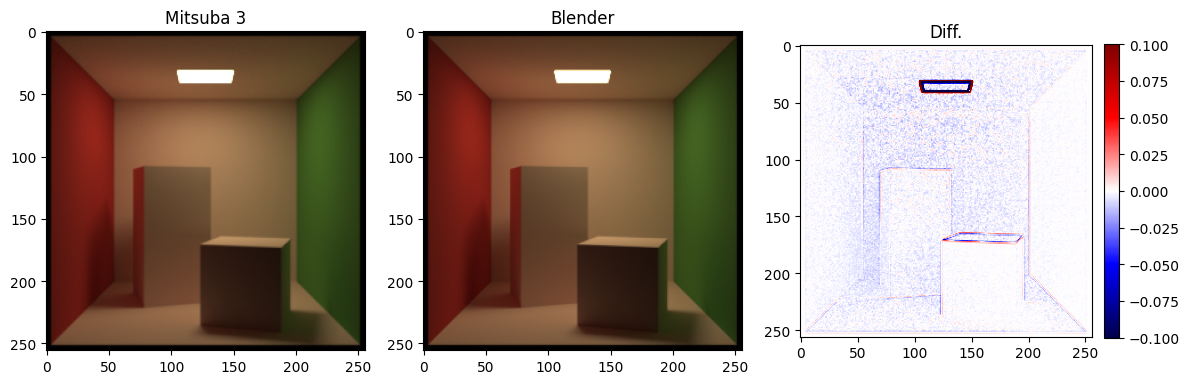

In [34]:
img_mi = mi.Bitmap("cbox_max8_rr5_spp4096.exr")
img_bd = mi.Bitmap(r"C:\Users\class\Dropbox\Academic\figures\cbox-blender\DDXYZ_VTRaw_SeqRaw_gauss1.5_bounce7_spp4096_seed0.exr")
plt.close('all')
plt.figure(figsize=(12, 4))
imshow_compare(img_mi, np.array(img_bd)[:,:,:3], title_img="Mitsuba 3", title_ref="Blender", vabs=0.1)

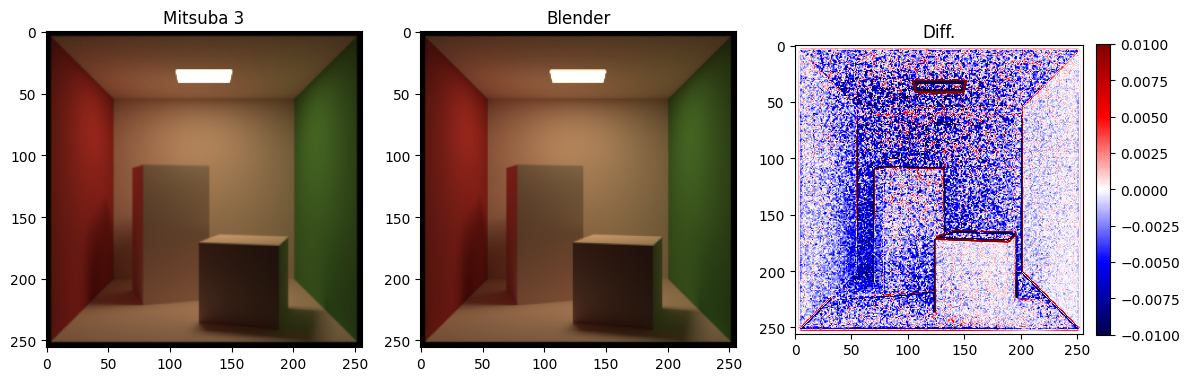

In [36]:
plt.figure(figsize=(12, 4))
imshow_compare(img_mi, np.array(img_bd)[:,:,:3], title_img="Mitsuba 3", title_ref="Blender", vabs=0.01)

 ## Compare with averaged images over seeds

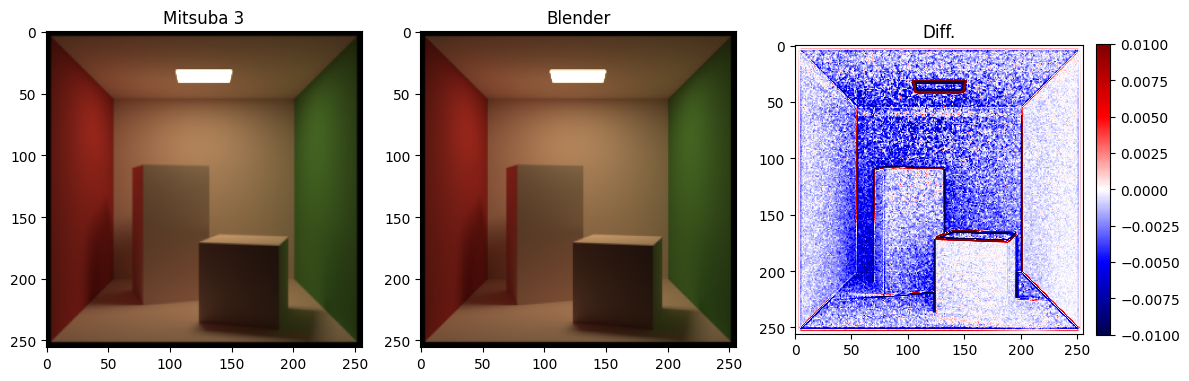

In [31]:
def imread_avg(filename: str, # mush include '%d'
               n: int
              ) -> np.ndarray:
    for i in range(n):
        if i == 0:
            img_sum = np.array(mi.Bitmap(filename % i)).astype(np.float64)
        else:
            img_sum += np.array(mi.Bitmap(filename % i))
    img_sum /= n
    return img_sum

n_seed = 5
img_mi = imread_avg("cbox_max8_rr5_spp4096_seed%d.exr", n_seed)
img_bd = imread_avg(r"C:\Users\class\Dropbox\Academic\figures\cbox-blender\DDXYZ_VTRaw_SeqRaw_gauss1.5_bounce7_spp4096_seed%d.exr", n_seed)
plt.close('all')
plt.figure(figsize=(12, 4))
imshow_compare(img_mi, np.array(img_bd)[:,:,:3], title_img="Mitsuba 3", title_ref="Blender", vabs=1e-2)

In [32]:
mi.cornell_box()

{'type': 'scene',
 'integrator': {'type': 'path', 'max_depth': 8},
 'sensor': {'type': 'perspective',
  'fov_axis': 'smaller',
  'near_clip': 0.001,
  'far_clip': 100.0,
  'focus_distance': 1000,
  'fov': 39.3077,
  'to_world': [[-1, 0, 0, 0],
   [0, 1, 0, 0],
   [0, 0, -1, 3.9],
   [0, 0, 0, 1]],
  'sampler': {'type': 'independent', 'sample_count': 64},
  'film': {'type': 'hdrfilm',
   'width': 256,
   'height': 256,
   'rfilter': {'type': 'gaussian'},
   'pixel_format': 'rgb',
   'component_format': 'float32'}},
 'white': {'type': 'diffuse',
  'reflectance': {'type': 'rgb', 'value': [0.885809, 0.698859, 0.666422]}},
 'green': {'type': 'diffuse',
  'reflectance': {'type': 'rgb', 'value': [0.105421, 0.37798, 0.076425]}},
 'red': {'type': 'diffuse',
  'reflectance': {'type': 'rgb', 'value': [0.570068, 0.0430135, 0.0443706]}},
 'light': {'type': 'rectangle',
  'to_world': [[0.23, 0, 0, 0],
   [0, -8.30516e-09, -0.19, 0.99],
   [0, 0.19, -8.30516e-09, 0.01],
   [0, 0, 0, 1]],
  'bsdf': {'